# Data Cleaning and Prep 

In [165]:
import nltk
import matplotlib
import os
import glob
import nltk, re, pprint
import pandas as pd
from nltk import word_tokenize
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer
import mpld3
import gensim 
import pyLDAvis.gensim
import numpy as np

In [166]:
# use glob to get all the files that end with .txt 
textFiles = glob.glob("Books/*txt")
textFiles
type(textFiles)

list

In [167]:
# transform into dictionary so I can have access to books
d = {}
for textFile in textFiles:
    d['f{0}'.format(textFile)] = open(textFile).read()
 
d.keys()

dict_keys(['fBooks/text_38.txt', 'fBooks/text_10.txt', 'fBooks/text_264.txt', 'fBooks/text_270.txt', 'fBooks/text_258.txt', 'fBooks/text_310.txt', 'fBooks/text_304.txt', 'fBooks/text_338.txt', 'fBooks/text_112.txt', 'fBooks/text_106.txt', 'fBooks/text_107.txt', 'fBooks/text_113.txt', 'fBooks/text_339.txt', 'fBooks/text_305.txt', 'fBooks/text_311.txt', 'fBooks/text_259.txt', 'fBooks/text_271.txt', 'fBooks/text_265.txt', 'fBooks/text_11.txt', 'fBooks/text_39.txt', 'fBooks/text_13.txt', 'fBooks/text_273.txt', 'fBooks/text_267.txt', 'fBooks/text_298.txt', 'fBooks/text_307.txt', 'fBooks/text_313.txt', 'fBooks/text_105.txt', 'fBooks/text_111.txt', 'fBooks/text_139.txt', 'fBooks/text_138.txt', 'fBooks/text_110.txt', 'fBooks/text_104.txt', 'fBooks/text_312.txt', 'fBooks/text_306.txt', 'fBooks/text_299.txt', 'fBooks/text_266.txt', 'fBooks/text_272.txt', 'fBooks/text_12.txt', 'fBooks/text_16.txt', 'fBooks/text_276.txt', 'fBooks/text_262.txt', 'fBooks/text_289.txt', 'fBooks/text_302.txt', 'fBooks

In [168]:
# convert the book titles into a list
book_titles = list(d.keys())

# convert values into a list
book_text = list(d.values())

# see first items 
book_text[338][:100]

'Table of Contents\n\n\n\tChapter One\n\nChapter Two\n\nChapter Three\n\nChapter Four\n\nChapter Five\n\nChapter Si'

In [169]:
# transform book titles into a book array to add as a column to a df later
book_array = np.asarray(book_titles)
type(book_array)

numpy.ndarray

## Stopwords, stemming, lemmatizing, and tokenizing 

This section is focused on defining some functions to manipulate the synopses. First, I load NLTK's list of English stop words. Stop words are words like "a", "the", or "in" which don't convey significant meaning. I also append 'towards' as a stopwords, since it appeared as a high frequency item and had to account for spelling (toward vs towards), and 'Chapter'

In [170]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

# add towards to the list of stop words 
additional_words = ['towards', 'Towards', 'Chapter', 'chapter', 'although', 'Although', 'however', 'However']
for i in range(len(additional_words)):
    stopwords.append(additional_words[i])

# check the stopwpords were added 
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Next I import the Snowball Stemmer and Lemmatizer to get to the root of the word or root meaning.

In [171]:
# load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# import WordNetLemmatizer as variable 'lemmatizer'
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

Below I define three functions:

* tokenize_and_stem: tokenizes (splits the synopsis into a list of its respective words (or tokens) and also stems each token
* tokenize_and_lemmatize: tokenizes (splits the synopsis into a list of its respective words (or tokens) and also lemmatizes each token
* tokenize_only: tokenizes the synopsis only

In [172]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


def tokenize_and_lemmatize(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lems = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lems

In [173]:
from nltk.tag import pos_tag

#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
def strip_proppers_POS(text):
    tagged = pos_tag(text) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if word.islower() and word.isalpha() and pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

# Filter for only nouns
def noun_only(text):
    pos_comment = nltk.pos_tag(text)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

Here I run the actual text processing (removing of proper nouns, tokenization, removal of stop words)

In [174]:
from gensim import corpora, models, similarities 

#tokenize and lemmatize 
%time tokenized_text = [tokenize_and_lemmatize(text) for text in book_text]

#remove stop words
%time preprocess = [[word for word in text if word not in stopwords] for text in tokenized_text]

# remove proper nouns
%time texts = [strip_proppers_POS(doc) for doc in preprocess]

CPU times: user 9min 44s, sys: 18.1 s, total: 10min 2s
Wall time: 10min 52s
CPU times: user 59 s, sys: 3.91 s, total: 1min 2s
Wall time: 1min 7s
CPU times: user 18min 9s, sys: 10.2 s, total: 18min 19s
Wall time: 22min 54s


# Latent Diriechlet Allocation Models

## Latent Dirichlet Allocation¶

This section focuses on using Latent Dirichlet Allocation (LDA) to learn yet more about the hidden structure within the 339 romance novels books. LDA is a probabilistic topic model that assumes documents are a mixture of topics and that each word in the document is attributable to the document's topics.

I use Gensim's implementation, and need a dictionary and a corpus that uses bag of words. 

In [175]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [253]:
# increase the topic number to 50
%time lda_mod50 = models.LdaModel(corpus, num_topics=50,id2word=dictionary, update_every=5, chunksize=1000, passes=100)


CPU times: user 1h 1min 1s, sys: 28 s, total: 1h 1min 29s
Wall time: 31min 45s
Perplexity:  -9.745288888462374
Coherence score:  0.4312407160779232


In [254]:
# Compute Perplexity
print('Perplexity: ', lda_mod50.log_perplexity(corpus)) 

# compute coherence
cm = gensim.models.coherencemodel.CoherenceModel(
         model=lda_mod50, texts=texts,
         dictionary=dictionary, coherence='c_v')   
                                                
print('Coherence score: ', cm.get_coherence())

Perplexity:  -9.745287506498784
Coherence score:  0.40232319830591656


# 40 topics

In [255]:
# increase the topic number to 50
%time lda_mod40 = models.LdaModel(corpus, num_topics=40,id2word=dictionary, update_every=5, chunksize=1000, passes=100)


CPU times: user 1h 32min 2s, sys: 30.4 s, total: 1h 32min 33s
Wall time: 51min 35s


In [256]:
# Compute Perplexity
print('Perplexity: ', lda_mod40.log_perplexity(corpus)) 

# compute coherence
cm = gensim.models.coherencemodel.CoherenceModel(
         model=lda_mod40, texts=texts,
         dictionary=dictionary, coherence='c_v')   
                                                
print('Coherence score: ', cm.get_coherence())

Perplexity:  -9.513485913168257
Coherence score:  0.37610360758780886


# 30 topics

In [227]:
# increase the topic number to 30
%time lda_mod30 = models.LdaModel(corpus, num_topics=30,id2word=dictionary, update_every=5, chunksize=1000, passes=100)

# Compute Perplexity
print('Perplexity: ', lda_mod30.log_perplexity(corpus)) 

# compute coherence
cm = gensim.models.coherencemodel.CoherenceModel(
         model=lda_mod30, texts=texts,
         dictionary=dictionary, coherence='c_v')   
                                                
print('Coherence score: ', cm.get_coherence())


CPU times: user 44min 28s, sys: 21.8 s, total: 44min 49s
Wall time: 23min 8s
Perplexity:  -9.352882549997572
Coherence score:  0.4312407160779232


In [270]:
lda_mod30.show_topics(30, 100)

[(0,
  '0.043*"fi" + 0.018*"fl" + 0.006*"truck" + 0.006*"murder" + 0.006*"police" + 0.005*"rst" + 0.005*"nd" + 0.005*"sheriff" + 0.004*"ngers" + 0.004*"gun" + 0.004*"ed" + 0.004*"bank" + 0.004*"offi" + 0.004*"demanded" + 0.004*"murmured" + 0.004*"killed" + 0.003*"partner" + 0.003*"report" + 0.003*"ce" + 0.003*"client" + 0.003*"warned" + 0.003*"drug" + 0.003*"corrected" + 0.003*"lab" + 0.003*"attorney" + 0.003*"evidence" + 0.003*"land" + 0.002*"defense" + 0.002*"cop" + 0.002*"law" + 0.002*"chief" + 0.002*"muttered" + 0.002*"crime" + 0.002*"lightly" + 0.002*"lled" + 0.002*"arrest" + 0.002*"ing" + 0.002*"oor" + 0.002*"witness" + 0.002*"court" + 0.002*"noted" + 0.002*"repeated" + 0.002*"million" + 0.002*"spun" + 0.002*"county" + 0.002*"bullet" + 0.002*"agreement" + 0.002*"wound" + 0.002*"n" + 0.002*"plant" + 0.002*"suspect" + 0.002*"lawyer" + 0.002*"thief" + 0.002*"e" + 0.002*"dollar" + 0.002*"judge" + 0.002*"weapon" + 0.002*"clue" + 0.002*"agent" + 0.002*"solid" + 0.002*"plea" + 0.002*"ki

# 25 topics

In [220]:
# increase the topic number to 15
%time lda_mod25 = models.LdaModel(corpus, num_topics=25,id2word=dictionary, update_every=5, chunksize=1000, passes=100)



CPU times: user 40min 27s, sys: 17.9 s, total: 40min 45s
Wall time: 20min 48s


In [221]:
# Compute Perplexity
print('Perplexity: ', lda_mod25.log_perplexity(corpus)) 

# compute coherence
cm = gensim.models.coherencemodel.CoherenceModel(
         model=lda_mod25, texts=texts,
         dictionary=dictionary, coherence='c_v')   
                                                
print('Coherence score: ', cm.get_coherence())

Perplexity:  -9.284951473567174
Coherence score:  0.42955171581788354


In [222]:
lda_mod25.show_topics(25, num_words = 200)

[(0,
  '0.010*"horse" + 0.008*"actor" + 0.006*"phaeton" + 0.005*"rally" + 0.005*"uncle" + 0.005*"postcard" + 0.004*"inn" + 0.004*"stable" + 0.004*"gown" + 0.004*"carriage" + 0.004*"scone" + 0.004*"advertisement" + 0.004*"stage" + 0.004*"tub" + 0.004*"rein" + 0.003*"coat" + 0.003*"gun" + 0.003*"abolition" + 0.003*"warehouse" + 0.003*"newspaper" + 0.003*"lilac" + 0.003*"reporter" + 0.003*"bath" + 0.003*"shy" + 0.002*"servant" + 0.002*"coaching" + 0.002*"maid" + 0.002*"couch" + 0.002*"tea" + 0.002*"midnight" + 0.002*"enslaved" + 0.002*"elope" + 0.002*"hat" + 0.002*"sketchbook" + 0.002*"tiara" + 0.002*"tugged" + 0.002*"scandal" + 0.002*"protect" + 0.002*"dangerous" + 0.002*"glove" + 0.002*"shawl" + 0.002*"forgive" + 0.002*"danger" + 0.002*"marrying" + 0.002*"parlor" + 0.002*"cargo" + 0.002*"bride" + 0.002*"gig" + 0.002*"worker" + 0.002*"highwayman" + 0.002*"bosom" + 0.002*"footman" + 0.002*"slave" + 0.002*"eloping" + 0.002*"horrible" + 0.002*"travel" + 0.002*"fret" + 0.002*"soap" + 0.002*"

# 15 topics

In [184]:
# increase the topic number to 15
%time lda_mod15 = models.LdaModel(corpus, num_topics=15,id2word=dictionary, update_every=5, chunksize=1000, passes=100)



CPU times: user 40min 18s, sys: 17.5 s, total: 40min 35s
Wall time: 20min 53s


In [185]:
# Compute Perplexity
print('Perplexity: ', lda_mod15.log_perplexity(corpus)) 

# compute coherence
cm = gensim.models.coherencemodel.CoherenceModel(
         model=lda_mod15, texts=texts,
         dictionary=dictionary, coherence='c_v')   
                                                
print('Coherence score: ', cm.get_coherence())

Perplexity:  -9.150872083595102
Coherence score:  0.4361894335250654


In [186]:
lda_mod15.show_topics(15, num_words = 200)

[(0,
  '0.005*"shit" + 0.005*"asks" + 0.003*"fucking" + 0.003*"lean" + 0.003*"mom" + 0.003*"press" + 0.003*"dad" + 0.003*"na" + 0.003*"fuck" + 0.002*"couch" + 0.002*"lift" + 0.002*"slide" + 0.002*"shrug" + 0.002*"gon" + 0.002*"squeeze" + 0.002*"apartment" + 0.002*"player" + 0.002*"yeah" + 0.002*"text" + 0.002*"camera" + 0.002*"field" + 0.001*"chuckle" + 0.001*"shift" + 0.001*"raise" + 0.001*"snap" + 0.001*"draw" + 0.001*"dick" + 0.001*"pause" + 0.001*"season" + 0.001*"video" + 0.001*"fan" + 0.001*"reply" + 0.001*"football" + 0.001*"stage" + 0.001*"cross" + 0.001*"rise" + 0.001*"huh" + 0.001*"client" + 0.001*"smirk" + 0.001*"shoot" + 0.001*"groan" + 0.001*"photo" + 0.001*"panty" + 0.001*"pop" + 0.001*"climb" + 0.001*"stretch" + 0.001*"brush" + 0.001*"rub" + 0.001*"suck" + 0.001*"sits" + 0.001*"song" + 0.001*"cock" + 0.001*"interview" + 0.001*"campaign" + 0.001*"elevator" + 0.001*"swallow" + 0.001*"yell" + 0.001*"human" + 0.001*"toss" + 0.001*"jerk" + 0.001*"manage" + 0.001*"dating" + 0.

## LDA model: chunking 1000 and topics 20

In [176]:
# increase the topic number to 20
%time lda_mod20 = models.LdaModel(corpus, num_topics=20,id2word=dictionary, update_every=5, chunksize=1000, passes=100)

CPU times: user 40min 15s, sys: 19 s, total: 40min 34s
Wall time: 20min 50s


# Topic Matrices

In [177]:
lda_mod20.show_topics(20, num_words = 200)

[(0,
  '0.003*"cousin" + 0.002*"apartment" + 0.002*"pregnant" + 0.002*"dish" + 0.002*"band" + 0.002*"countered" + 0.001*"uncle" + 0.001*"former" + 0.001*"cooking" + 0.001*"cook" + 0.001*"porch" + 0.001*"flower" + 0.001*"staircase" + 0.001*"protect" + 0.001*"hospital" + 0.001*"property" + 0.001*"security" + 0.001*"drawled" + 0.001*"chef" + 0.001*"begun" + 0.001*"agent" + 0.001*"club" + 0.001*"garden" + 0.001*"matching" + 0.001*"angled" + 0.001*"student" + 0.001*"delicate" + 0.001*"apparent" + 0.001*"suite" + 0.001*"vacation" + 0.001*"television" + 0.001*"birthday" + 0.001*"vehicle" + 0.001*"slack" + 0.001*"aunt" + 0.001*"police" + 0.001*"sensual" + 0.001*"claimed" + 0.001*"throughout" + 0.001*"nurse" + 0.001*"dog" + 0.001*"slender" + 0.001*"revealed" + 0.001*"sport" + 0.001*"silk" + 0.001*"campaign" + 0.001*"tea" + 0.001*"staff" + 0.001*"law" + 0.001*"client" + 0.001*"discovered" + 0.001*"chicken" + 0.001*"parking" + 0.001*"gun" + 0.001*"salad" + 0.001*"grandmother" + 0.001*"crooned" + 

In [179]:
# Compute Perplexity
print('Perplexity: ', lda_mod20.log_perplexity(corpus)) 

# compute coherence
cm = gensim.models.coherencemodel.CoherenceModel(
         model=lda_mod20, texts=texts,
         dictionary=dictionary, coherence='c_v')   
                                                
print('Coherence score: ', cm.get_coherence())

Perplexity:  -9.22221208692604
Coherence score:  0.3919653138096262


# Heatmap comparing book topics

Source/inspo: https://github.com/FelixChop/MediumArticles/blob/master/LDA-BBC.ipynb

In [257]:
# get topics for every book 
topics = [lda_mod30[corpus[i]] for i in range(len(book_text))]

# define function to get the topics into a df 
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(30))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

# test function 
topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 15)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
# create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=30) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

document_topic.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0,0.000000,0.139866,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.519869,0.137601,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.015456
1,0.0,0,0.000000,0.000000,0.0,0.059286,0.0,0.0,0.0,0.031403,...,0.000000,0.407946,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0,0.135491,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.087685,0.0,0.0,0.000000,0.0,0.0,0.0,0.365794,0.000000
3,0.0,0,0.000000,0.063722,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.022529,0.0,0.0,0.000000,0.0,0.0,0.0,0.022954,0.000000
4,0.0,0,0.188734,0.051472,0.0,0.000000,0.0,0.0,0.0,0.020458,...,0.000000,0.133543,0.0,0.0,0.011989,0.0,0.0,0.0,0.164775,0.000000


### Visualize the topics in each book

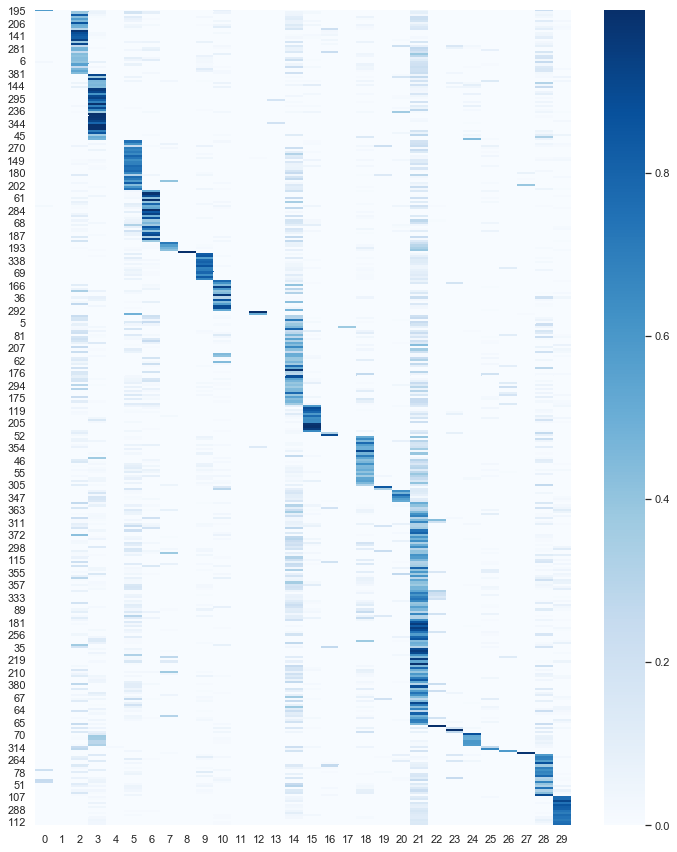

In [259]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(12,15)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index], cmap = 'Blues')

In [260]:
document_topic2 = document_topic

# Combine topic data to book meta data

In [261]:
# define function to get the numbers from rows with strings 
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

In [262]:
document_topic['standard_title'] = book_array

document_topic['book_title_number'] = document_topic['standard_title'].apply(lambda x: find_number(x))

document_topic.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,standard_title,book_title_number
0,0.0,0,0.000000,0.139866,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.015456,fBooks/text_38.txt,38
1,0.0,0,0.000000,0.000000,0.0,0.059286,0.0,0.0,0.0,0.031403,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,fBooks/text_10.txt,10
2,0.0,0,0.135491,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.365794,0.000000,fBooks/text_264.txt,264
3,0.0,0,0.000000,0.063722,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.022954,0.000000,fBooks/text_270.txt,270
4,0.0,0,0.188734,0.051472,0.0,0.000000,0.0,0.0,0.0,0.020458,...,0.0,0.0,0.011989,0.0,0.0,0.0,0.164775,0.000000,fBooks/text_258.txt,258


In [263]:
# read csv file with the book metadata 
book_metadata = pd.read_csv('List of Books and Authors - metadata.csv')

#book_metadata = book_metadata.set_index('file_number')

book_metadata['book_title_number'] = book_metadata['file_number'].apply(str)

book_metadata.head()

,Author,Book,Image,Year,Description,Buy,Book_old,file_number,book_title_number
0,Adriana Herrera,American Dreamer,https://images-na.ssl-images-amazon.com/images...,2020,No one ever said big dreams come easy\n\nFor N...,https://www.amazon.com/American-Dreamer-Dreame...,American dreamer,221,221
1,Adriana Herrera,American Love Story,https://m.media-amazon.com/images/I/41AY3Khzbl...,2019,No one should have to choose between love and ...,https://www.amazon.com/American-Love-Story-Dre...,American love story,222,222
2,Adriana Herrera,American Sweetheart,https://m.media-amazon.com/images/I/51RJdJyI+t...,2020,Juan Pablo Campos doesn't do regrets. He's liv...,https://www.amazon.com/American-Sweethearts-Dr...,American sweetheart,223,223
3,Adriana Herrera,Finding Joy,https://m.media-amazon.com/images/I/416M8GuOj3...,2020,"As his twenty-sixth birthday approaches, Desta...",https://www.amazon.com/Finding-Joy-Romance-Adr...,Finding joy,224,224
4,Adriana Herrera,Here to Stay,https://m.media-amazon.com/images/I/51ZN1hKljE...,2020,Starting over is more about who you're with th...,https://www.amazon.com/Here-Stay-Adriana-Herre...,Here to stay,225,225


In [264]:
book_df = document_topic.merge(book_metadata, how='outer', right_on = 'book_title_number', left_on = 'book_title_number')

book_df = book_df.set_index('Book')

book_df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,standard_title,book_title_number,Author,Image,Year,Description,Buy,Book_old,file_number
Book,,,,,,,,,,,,,,,,,,,,,
Stepping to a New Day,0.0,0.0,0.000000,0.139866,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.015456,fBooks/text_38.txt,38,Beverly Jenkins,https://i.imgur.com/AJuixZy.jpg,2016.0,"In Henry Adams, Kansas, you can't start over w...",https://www.goodreads.com/book/show/27064404-s...,Stepping to a new day,38.0
Her Lover's Legacy,0.0,0.0,0.000000,0.000000,0.0,0.059286,0.0,0.0,0.0,0.031403,...,0.000000,fBooks/text_10.txt,10,Adrianne Byrd,https://m.media-amazon.com/images/I/51QRhQpBff...,2008.0,Heir-apparent Malcolm Braddock may be the sexi...,https://www.amazon.com/gp/product/0373860765/r...,Her lovers legacy,10.0
Island Fling with the Tycoon,0.0,0.0,0.135491,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,fBooks/text_264.txt,264,Therese Beharrie,https://m.media-amazon.com/images/I/51Cqm0Ppgn...,2019.0,Could a fairytale weddindlead to her own love ...,https://www.amazon.com/Island-Fling-Tycoon-Har...,Island fling,264.0
The Kingmaker,0.0,0.0,0.000000,0.063722,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,fBooks/text_270.txt,270,Kennedy Ryan,https://i.imgur.com/WgtINQb.jpg,2019.0,"Power. Passion. Betrayal. Raised to rule, bred...",https://www.amazon.com/Kingmaker-All-Kings-Due...,The kingmaker,270.0
The Write Escape: An Irish Romance,0.0,0.0,0.188734,0.051472,0.0,0.000000,0.0,0.0,0.0,0.020458,...,0.000000,fBooks/text_258.txt,258,Charish Reid,https://m.media-amazon.com/images/I/419e+vtoBX...,2019.0,Take one heartbroken Chicago girl\n\nLiterary ...,https://www.amazon.com/Write-Escape-Charish-Re...,The write escape,258.0


In [265]:
book_viz = book_df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 'Author', 'Image', 'Year', 'Description', 'Buy']]

book_viz

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Author,Image,Year,Description,Buy
Book,,,,,,,,,,,,,,,,,,,,,
Stepping to a New Day,0.0,0.0,0.000000,0.139866,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.015456,Beverly Jenkins,https://i.imgur.com/AJuixZy.jpg,2016.0,"In Henry Adams, Kansas, you can't start over w...",https://www.goodreads.com/book/show/27064404-s...
Her Lover's Legacy,0.0,0.0,0.000000,0.000000,0.0,0.059286,0.000000,0.000000,0.0,0.031403,...,0.000000,0.0,0.0,0.000000,0.000000,Adrianne Byrd,https://m.media-amazon.com/images/I/51QRhQpBff...,2008.0,Heir-apparent Malcolm Braddock may be the sexi...,https://www.amazon.com/gp/product/0373860765/r...
Island Fling with the Tycoon,0.0,0.0,0.135491,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.365794,0.000000,Therese Beharrie,https://m.media-amazon.com/images/I/51Cqm0Ppgn...,2019.0,Could a fairytale weddindlead to her own love ...,https://www.amazon.com/Island-Fling-Tycoon-Har...
The Kingmaker,0.0,0.0,0.000000,0.063722,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.022954,0.000000,Kennedy Ryan,https://i.imgur.com/WgtINQb.jpg,2019.0,"Power. Passion. Betrayal. Raised to rule, bred...",https://www.amazon.com/Kingmaker-All-Kings-Due...
The Write Escape: An Irish Romance,0.0,0.0,0.188734,0.051472,0.0,0.000000,0.000000,0.000000,0.0,0.020458,...,0.000000,0.0,0.0,0.164775,0.000000,Charish Reid,https://m.media-amazon.com/images/I/419e+vtoBX...,2019.0,Take one heartbroken Chicago girl\n\nLiterary ...,https://www.amazon.com/Write-Escape-Charish-Re...
Higher Love,0.0,0.0,0.011763,0.000000,0.0,0.134863,0.239464,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,Alexandria House,https://m.media-amazon.com/images/I/515nkoL5MK...,2016.0,"Popular travel blogger, Greer Kennedy, is livi...",https://www.amazon.com/Higher-Love-After-Book-...
Go Deep,0.0,0.0,0.431860,0.000000,0.0,0.053072,0.109214,0.000000,0.0,0.024206,...,0.000000,0.0,0.0,0.026148,0.000000,Rilzy Adams,https://m.media-amazon.com/images/I/41wKLNq64-...,2020.0,It was all supposed to be so simple. Navaya Ho...,https://www.amazon.com/Go-Deep-Unexpected-Love...
The Sweetest Surrender,0.0,0.0,0.000000,0.000000,0.0,0.046868,0.022709,0.000000,0.0,0.763579,...,0.000000,0.0,0.0,0.000000,0.000000,Stephanie Nicole Norris,https://m.media-amazon.com/images/I/51oJyo3-Pb...,2018.0,"Effervescent, Fearless, and self-assured, Sele...",https://www.amazon.com/Sweetest-Surrender-Fall...
His Diamond Queen,0.0,0.0,0.149420,0.011415,0.0,0.000000,0.015440,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.093756,0.000000,Lena Hart,https://m.media-amazon.com/images/I/91E1aODCUc...,2014.0,"Loyalty comes at a cost. Former MMA fighter, J...",https://www.amazon.com/His-Diamond-Queen-Quart...


In [266]:
book_viz['max_val'] = book_viz[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]].max(axis=1)
book_viz['max_col'] = book_viz[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]].idxmax(axis=1)

#document_topic['second_largest'] = document_topic.apply(lambda row: row.nlargest(2).values[-1],axis=1)
book_viz

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,Author,Image,Year,Description,Buy,max_val,max_col
Book,,,,,,,,,,,,,,,,,,,,,
Stepping to a New Day,0.0,0.0,0.000000,0.139866,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.015456,Beverly Jenkins,https://i.imgur.com/AJuixZy.jpg,2016.0,"In Henry Adams, Kansas, you can't start over w...",https://www.goodreads.com/book/show/27064404-s...,0.519869,20.0
Her Lover's Legacy,0.0,0.0,0.000000,0.000000,0.0,0.059286,0.000000,0.000000,0.0,0.031403,...,0.0,0.000000,0.000000,Adrianne Byrd,https://m.media-amazon.com/images/I/51QRhQpBff...,2008.0,Heir-apparent Malcolm Braddock may be the sexi...,https://www.amazon.com/gp/product/0373860765/r...,0.456735,18.0
Island Fling with the Tycoon,0.0,0.0,0.135491,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.365794,0.000000,Therese Beharrie,https://m.media-amazon.com/images/I/51Cqm0Ppgn...,2019.0,Could a fairytale weddindlead to her own love ...,https://www.amazon.com/Island-Fling-Tycoon-Har...,0.365794,28.0
The Kingmaker,0.0,0.0,0.000000,0.063722,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.022954,0.000000,Kennedy Ryan,https://i.imgur.com/WgtINQb.jpg,2019.0,"Power. Passion. Betrayal. Raised to rule, bred...",https://www.amazon.com/Kingmaker-All-Kings-Due...,0.866606,10.0
The Write Escape: An Irish Romance,0.0,0.0,0.188734,0.051472,0.0,0.000000,0.000000,0.000000,0.0,0.020458,...,0.0,0.164775,0.000000,Charish Reid,https://m.media-amazon.com/images/I/419e+vtoBX...,2019.0,Take one heartbroken Chicago girl\n\nLiterary ...,https://www.amazon.com/Write-Escape-Charish-Re...,0.246172,14.0
Higher Love,0.0,0.0,0.011763,0.000000,0.0,0.134863,0.239464,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,Alexandria House,https://m.media-amazon.com/images/I/515nkoL5MK...,2016.0,"Popular travel blogger, Greer Kennedy, is livi...",https://www.amazon.com/Higher-Love-After-Book-...,0.306235,14.0
Go Deep,0.0,0.0,0.431860,0.000000,0.0,0.053072,0.109214,0.000000,0.0,0.024206,...,0.0,0.026148,0.000000,Rilzy Adams,https://m.media-amazon.com/images/I/41wKLNq64-...,2020.0,It was all supposed to be so simple. Navaya Ho...,https://www.amazon.com/Go-Deep-Unexpected-Love...,0.431860,2.0
The Sweetest Surrender,0.0,0.0,0.000000,0.000000,0.0,0.046868,0.022709,0.000000,0.0,0.763579,...,0.0,0.000000,0.000000,Stephanie Nicole Norris,https://m.media-amazon.com/images/I/51oJyo3-Pb...,2018.0,"Effervescent, Fearless, and self-assured, Sele...",https://www.amazon.com/Sweetest-Surrender-Fall...,0.763579,9.0
His Diamond Queen,0.0,0.0,0.149420,0.011415,0.0,0.000000,0.015440,0.000000,0.0,0.000000,...,0.0,0.093756,0.000000,Lena Hart,https://m.media-amazon.com/images/I/91E1aODCUc...,2014.0,"Loyalty comes at a cost. Former MMA fighter, J...",https://www.amazon.com/His-Diamond-Queen-Quart...,0.463980,18.0


In [267]:
bookData = book_viz.reset_index()
bookData = bookData.reset_index()

# this is the file I use for the app 
bookData.to_csv('books.csv')

# Book recommendation based on LDA

In [268]:
import itertools 

# define functions 
bookList = bookData['Book']
bookIndex = bookData['index']
bookAuthor = bookData['Author']
index2 = similarities.MatrixSimilarity(lda_mod30[corpus])


#userSelection = 6
userSelection = input("Hey, please enter the book you would like to find similar books for: ")

#listOfRelatedBooks = []
corpus_to_compare = []
names_of_related_books = []
identifiedTopic = 55

for book in range(len(bookList)-1):
    if userSelection == bookList[book]:
          corpusA = corpus[bookIndex[book]]
          vec_lda = lda_mod30[corpusA]
          corpus_to_compare.append(vec_lda)

sim = index2[vec_lda]
sims = sorted(enumerate(sim), key=lambda item: -item[1])
DoublelistOfRelatedBooks = [list(group) for val, group in itertools.groupby(sims, lambda x: x[1] >= .95) if val]
listOfRelatedBooks = DoublelistOfRelatedBooks[0]

# split tuples into two lists with book name and similarity score 
book_name, score = map(list, zip(*listOfRelatedBooks))

# iterate to get the name of the books and not the book index 
for book in book_name:
     if (bookIndex[book]== book_name).any():
        names_of_related_books.append(bookList[book])
        names_of_related_books.append(' by ' + str(bookAuthor[book]) + '\n')

print("Here's your list:" + '\n' + ''.join(names_of_related_books) + ' ')

print('Happy reading!')


Hey, please enter the book you would like to find similar books for: Go Deep
Here's your list:
Go Deep by Rilzy Adams
Birthday Shot by Rilzy Adams
Royal Tease by Nana Malone
Private Eye by Katrina Jackson
 
Happy reading!


# Import Models using Picke

In [269]:
import pickle 

# save the corpus
pickle_out2 = open("corpus.pkl", mode = "wb") 
pickle.dump(corpus, pickle_out2) 
pickle_out2.close()

# save the lda model 
pickle_out = open("lda.pkl", mode = "wb") 
pickle.dump(lda_mod30, pickle_out) 
pickle_out.close()



# LDA using Mallet

In [41]:
import os
from gensim.models.wrappers import LdaMallet


os.environ.update({'MALLET_HOME':'/Users/vclugoar/new_mallet/mallet-2.0.8'})

#os.environ['MALLET_HOME'] = 

mallet_path ='/Users/vclugoar/new_mallet/mallet-2.0.8/bin/mallet'

mallet_lda = LdaMallet(mallet_path, corpus, dictionary, 20, 
                       optimize_interval=10, prefix = 'm_')
                      

CalledProcessError: Command '/Users/vclugoar/new_mallet/mallet-2.0.8/bin/mallet train-topics --input m_corpus.mallet --num-topics Dictionary(42824 unique tokens: ['abandoned', 'abhor', 'ability', 'abject', 'abuela']...)  --alpha 20 --optimize-interval 10 --num-threads 4 --output-state m_state.mallet.gz --output-doc-topics m_doctopics.txt --output-topic-keys m_topickeys.txt --num-iterations 1000 --inferencer-filename m_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 0' returned non-zero exit status 2.

In [279]:
df3 = pd.read_csv('books2.csv')
df3.columns

Index(['Unnamed: 0', 'index', 'Book', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', 'Author',
       'Image', 'Year', 'Description', 'Buy', 'max_val', 'max_col', 'h0', 'h1',
       'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12',
       'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22',
       'h23', 'h24', 'h25', 'h26', 'h27', 'h28', 'h29'],
      dtype='object')

In [297]:
df3 = df3[df3['3'] > 0]
list(df3['Book'])

['Stepping to a New Day',
 'The Kingmaker',
 'The Write Escape: An Irish Romance',
 'His Diamond Queen',
 'Amazing Grace',
 'Something Old',
 'The Rebel King',
 'Taming of Jessi Rose',
 'Measure of a Man',
 'A Sweet Surrender',
 'Sultry in Stilettos',
 'When You Are Mine',
 'Love Takes Time',
 'Surrender to Love',
 'The Bashful Bride',
 'Untamed Love',
 'Make a Scene',
 'Black Dahlia',
 "Love's Sweet Melody",
 'Loving the Lawman',
 'The Pleasure of His Company',
 'The Bewildered Bride',
 'Sinful Chocolate',
 "Destiny's Surrender",
 'Blame It on the Billionaire',
 'No Hiding for The Guilty',
 'This Tender Melody',
 'Something Borrowed',
 'Made to Love',
 'A Duke, the Lady and a Baby',
 'Beauty and the Bachelor',
 "Destiny's Embrace",
 'Every Beat of My Heart',
 'A Hope Divided',
 'Delectable Desire',
 "A Millionaire's Arranged Marriage",
 'His San Diego Sweetheart',
 'The Inheritance',
 'Private Passions',
 'All My Tomorrows',
 "Thorn's Challenge",
 'Home to Wickham Falls',
 'Taken by S

In [292]:
df5 = df3[['Book', 'h0', 'h1',
       'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12',
       'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22',
       'h23', 'h24', 'h25', 'h26', 'h27', 'h28', 'h29']]

df5.to_csv('test2.csv')

In [293]:
df5

,Book,h0,h1,h2,h3,h4,h5,h6,h7,h8,...,h20,h21,h22,h23,h24,h25,h26,h27,h28,h29
0,Stepping to a New Day,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,Her Lover's Legacy,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Island Fling with the Tycoon,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,The Kingmaker,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,The Write Escape: An Irish Romance,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5,Higher Love,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6,Go Deep,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
7,The Sweetest Surrender,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8,His Diamond Queen,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
9,Amazing Grace,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [289]:
df6

,0,1,2,3,4,5,6,7,8,9,...,383,384,385,386,387,388,389,390,391,392
Book,Stepping to a New Day,Her Lover's Legacy,Island Fling with the Tycoon,The Kingmaker,The Write Escape: An Irish Romance,Higher Love,Go Deep,The Sweetest Surrender,His Diamond Queen,Amazing Grace,...,Only If You Dare,Believe in Me,Love's Serenade,Bare Pleasures,Scoring with the Wrong Twin,Relationship Goals,Grip,Belle,Midnight,Baked With Love 2
h0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
h1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
h2,0,0,1,0,1,1,1,0,1,0,...,0,1,0,1,1,1,0,0,0,0
h3,1,0,0,1,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,1,0
h4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
h5,0,1,0,0,0,1,1,1,0,0,...,1,1,1,1,0,0,0,0,0,0
h6,0,0,0,0,0,1,1,1,1,0,...,0,1,0,0,0,1,1,0,0,0
h7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
h8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
